# Linear Regression Series - Part 3

Link Blog: [**Klik di sini**](https://www.alokademy.com/2023/02/linear-regression-series-part-3.html)


### Import package yang diperlukan


In [1]:
from matplotlib import pyplot
import numpy as np
import random

### Membuat sample dataset


In [2]:
features = np.array([1,2,3,5,6,7])
labels = np.array([1.55, 1.97, 2.44, 3.56, 4.07, 4.48])

print(features)
print(labels)

[1 2 3 5 6 7]
[1.55 1.97 2.44 3.56 4.07 4.48]


### Fungsi untuk membuat plot


In [3]:
def draw_line(slope, y_intercept, color='grey', linewidth=0.7, starting=0, ending=8):
    x = np.linspace(starting, ending, 1000)
    pyplot.plot(x, y_intercept + slope*x, linestyle='-', color=color, linewidth=linewidth)

def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    pyplot.scatter(X, y)
    pyplot.xlabel('jumlah kamar')
    pyplot.ylabel('harga')

### Memindahkan garis menggunakan square trick


In [4]:
def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    #perbarui model
    predicted_price = base_price + price_per_room*num_rooms
    
    #perbarui slope (harga per kamar)
    price_per_room += learning_rate*num_rooms*(price-predicted_price)
    
    #perbarui y-intercept (harga dasar rumah)
    base_price += learning_rate*(price-predicted_price)
    
    return price_per_room, base_price

### Root mean squared error function


In [5]:
def rmse(labels, predictions):
    n = len(labels)
    differences = np.subtract(labels, predictions)
    return np.sqrt(1.0/n * (np.dot(differences, differences)))

### Plotting Error Function


Harga per kamar: 0.5099699559850331
Harga dasar: 0.9866319723142626


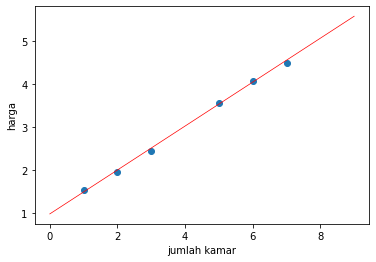

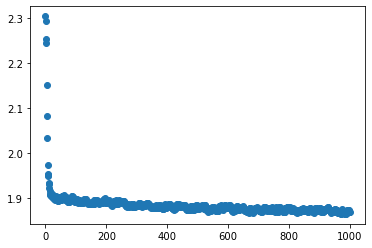

(0.5099699559850331, 0.9866319723142626)

In [6]:
random.seed(1)
def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    # init error
    errors = []

    for i in range(epochs):
        # p̂ = mk + b 
        predictions = features[0]*price_per_room+base_price

        errors.append(rmse(labels, predictions))
        
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        price_per_room, base_price = square_trick(base_price, price_per_room, num_rooms, price, learning_rate=learning_rate)
                                                  
    draw_line(price_per_room, base_price, 'red', starting=0, ending=9)
    plot_points(features, labels)

    print('Harga per kamar:', price_per_room)
    print('Harga dasar:', base_price)
    pyplot.show()
    
    pyplot.scatter(range(len(errors)), errors)
    pyplot.show()
    
    return price_per_room, base_price

linear_regression(features, labels, learning_rate = 0.01, epochs = 1000)